In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('temp_data.csv', encoding='cp949')
df

,날짜,지점,평균기온,최저기온,최고기온
0,2006-01-01,108,1.4,0.6,1.8
1,2006-01-02,108,0.2,-2.4,3.9
2,2006-01-03,108,-2.4,-4.5,1.2
3,2006-01-04,108,-6.2,-8.3,-4.4
4,2006-01-05,108,-7.1,-10.0,-2.5
...,...,...,...,...,...
5346,2020-08-21,108,26.6,25.2,29.2
5347,2020-08-22,108,24.3,21.7,27.6
5348,2020-08-23,108,25.3,21.5,29.9
5349,2020-08-24,108,27.8,23.7,32.0


In [18]:
df = df.rename({'평균기온(℃)':'평균기온'}, axis=1)
df = df.rename({'최저기온(℃)':'최저기온'}, axis=1)
df = df.rename({'최고기온(℃)':'최고기온'}, axis=1)
df

,날짜,지점,평균기온,최저기온,최고기온
0,2006-01-01,108,1.4,0.6,1.8
1,2006-01-02,108,0.2,-2.4,3.9
2,2006-01-03,108,-2.4,-4.5,1.2
3,2006-01-04,108,-6.2,-8.3,-4.4
4,2006-01-05,108,-7.1,-10.0,-2.5
...,...,...,...,...,...
5346,2020-08-21,108,26.6,25.2,29.2
5347,2020-08-22,108,24.3,21.7,27.6
5348,2020-08-23,108,25.3,21.5,29.9
5349,2020-08-24,108,27.8,23.7,32.0


In [19]:
year = []
month = []
for i in range(len(df)):
    year.append(int(df['날짜'][i].split('-')[0]))
df['년'] = year
for i in range(len(df)):
    month.append(int(df['날짜'][i].split('-')[1]))
df['월'] = month
df

,날짜,지점,평균기온,최저기온,최고기온,년,월
0,2006-01-01,108,1.4,0.6,1.8,2006,1
1,2006-01-02,108,0.2,-2.4,3.9,2006,1
2,2006-01-03,108,-2.4,-4.5,1.2,2006,1
3,2006-01-04,108,-6.2,-8.3,-4.4,2006,1
4,2006-01-05,108,-7.1,-10.0,-2.5,2006,1
...,...,...,...,...,...,...,...
5346,2020-08-21,108,26.6,25.2,29.2,2020,8
5347,2020-08-22,108,24.3,21.7,27.6,2020,8
5348,2020-08-23,108,25.3,21.5,29.9,2020,8
5349,2020-08-24,108,27.8,23.7,32.0,2020,8


In [20]:
train_data = (df['년'] <= 2019)
test_data = (df['년'] >= 2020)
print(test_data)
interval = 6

0       False
1       False
2       False
3       False
4       False
        ...  
5346     True
5347     True
5348     True
5349     True
5350     True
Name: 년, Length: 5351, dtype: bool


In [21]:
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data['평균기온'])

    for i in range(len(temps)):
        if i < interval:
            continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return x, y

In [23]:
x_train, y_train = make_data(df[train_data]) # 2006~2019
x_test, y_test = make_data(df[test_data]) # 2020
print(x_test)
print(y_test)

[[-2.2, 1.0, -0.1, 1.2, 1.3, 3.1], [1.0, -0.1, 1.2, 1.3, 3.1, 6.3], [-0.1, 1.2, 1.3, 3.1, 6.3, 2.4], [1.2, 1.3, 3.1, 6.3, 2.4, -1.2], [1.3, 3.1, 6.3, 2.4, -1.2, -0.6], [3.1, 6.3, 2.4, -1.2, -0.6, -0.1], [6.3, 2.4, -1.2, -0.6, -0.1, -1.0], [2.4, -1.2, -0.6, -0.1, -1.0, -2.9], [-1.2, -0.6, -0.1, -1.0, -2.9, -2.3], [-0.6, -0.1, -1.0, -2.9, -2.3, -2.7], [-0.1, -1.0, -2.9, -2.3, -2.7, -1.7], [-1.0, -2.9, -2.3, -2.7, -1.7, -0.6], [-2.9, -2.3, -2.7, -1.7, -0.6, 0.3], [-2.3, -2.7, -1.7, -0.6, 0.3, 1.9], [-2.7, -1.7, -0.6, 0.3, 1.9, 0.7], [-1.7, -0.6, 0.3, 1.9, 0.7, -0.4], [-0.6, 0.3, 1.9, 0.7, -0.4, 3.0], [0.3, 1.9, 0.7, -0.4, 3.0, 4.6], [1.9, 0.7, -0.4, 3.0, 4.6, 2.8], [0.7, -0.4, 3.0, 4.6, 2.8, 4.3], [-0.4, 3.0, 4.6, 2.8, 4.3, 5.5], [3.0, 4.6, 2.8, 4.3, 5.5, 5.9], [4.6, 2.8, 4.3, 5.5, 5.9, 6.8], [2.8, 4.3, 5.5, 5.9, 6.8, 6.0], [4.3, 5.5, 5.9, 6.8, 6.0, 5.2], [5.5, 5.9, 6.8, 6.0, 5.2, 3.9], [5.9, 6.8, 6.0, 5.2, 3.9, 2.6], [6.8, 6.0, 5.2, 3.9, 2.6, 1.5], [6.0, 5.2, 3.9, 2.6, 1.5, -0.4], [5.2, 

In [9]:
# Linear Regression 알고리즘 사용
model = LinearRegression(normalize=True)
# 학습
model.fit(x_train, y_train)
# 검증(예측)
y_predict = model.predict(x_test)

평균= 1.6449368669342912
최대오차= 10.685969594050539


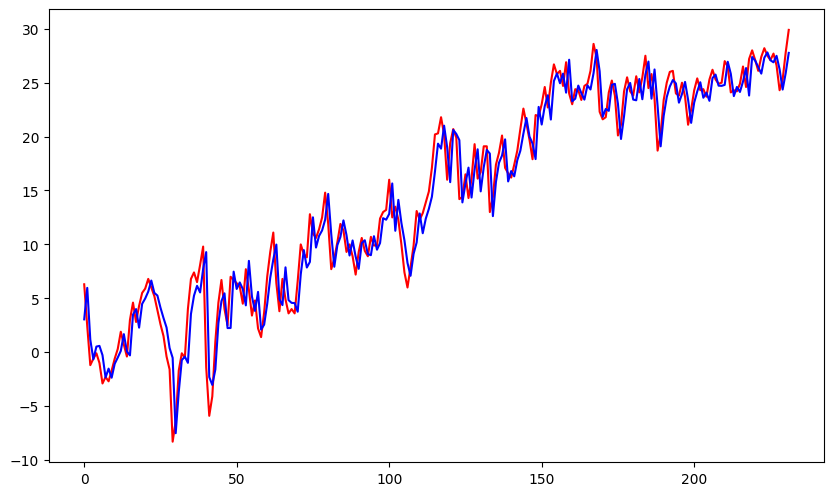

In [10]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(y_test, c='r')
plt.plot(y_predict, c='b')
# plt.savefig('weath-tmp.png')
plt.show

diff_y = abs(y_predict - y_test)
print('평균=', sum(diff_y)/ len(diff_y))
print('최대오차=', max(diff_y))